# Analysis of data

[link to data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

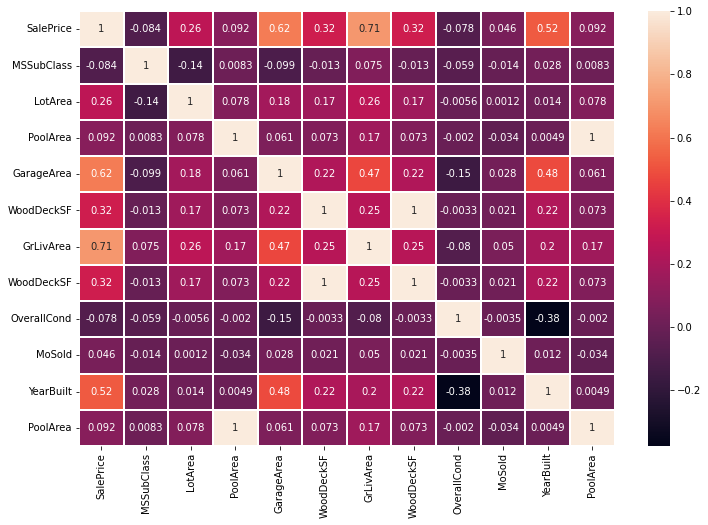

In [4]:
cols = ['SalePrice','MSSubClass','LotArea','PoolArea','GarageArea','WoodDeckSF','GrLivArea','WoodDeckSF','OverallCond','MoSold','YearBuilt','PoolArea']

data = df[cols].corr()
plt.figure(figsize=(12,8))
hm = sns.heatmap(data,cbar=True,annot=True, xticklabels=cols, yticklabels = cols, linewidths = 2)
plt.show()

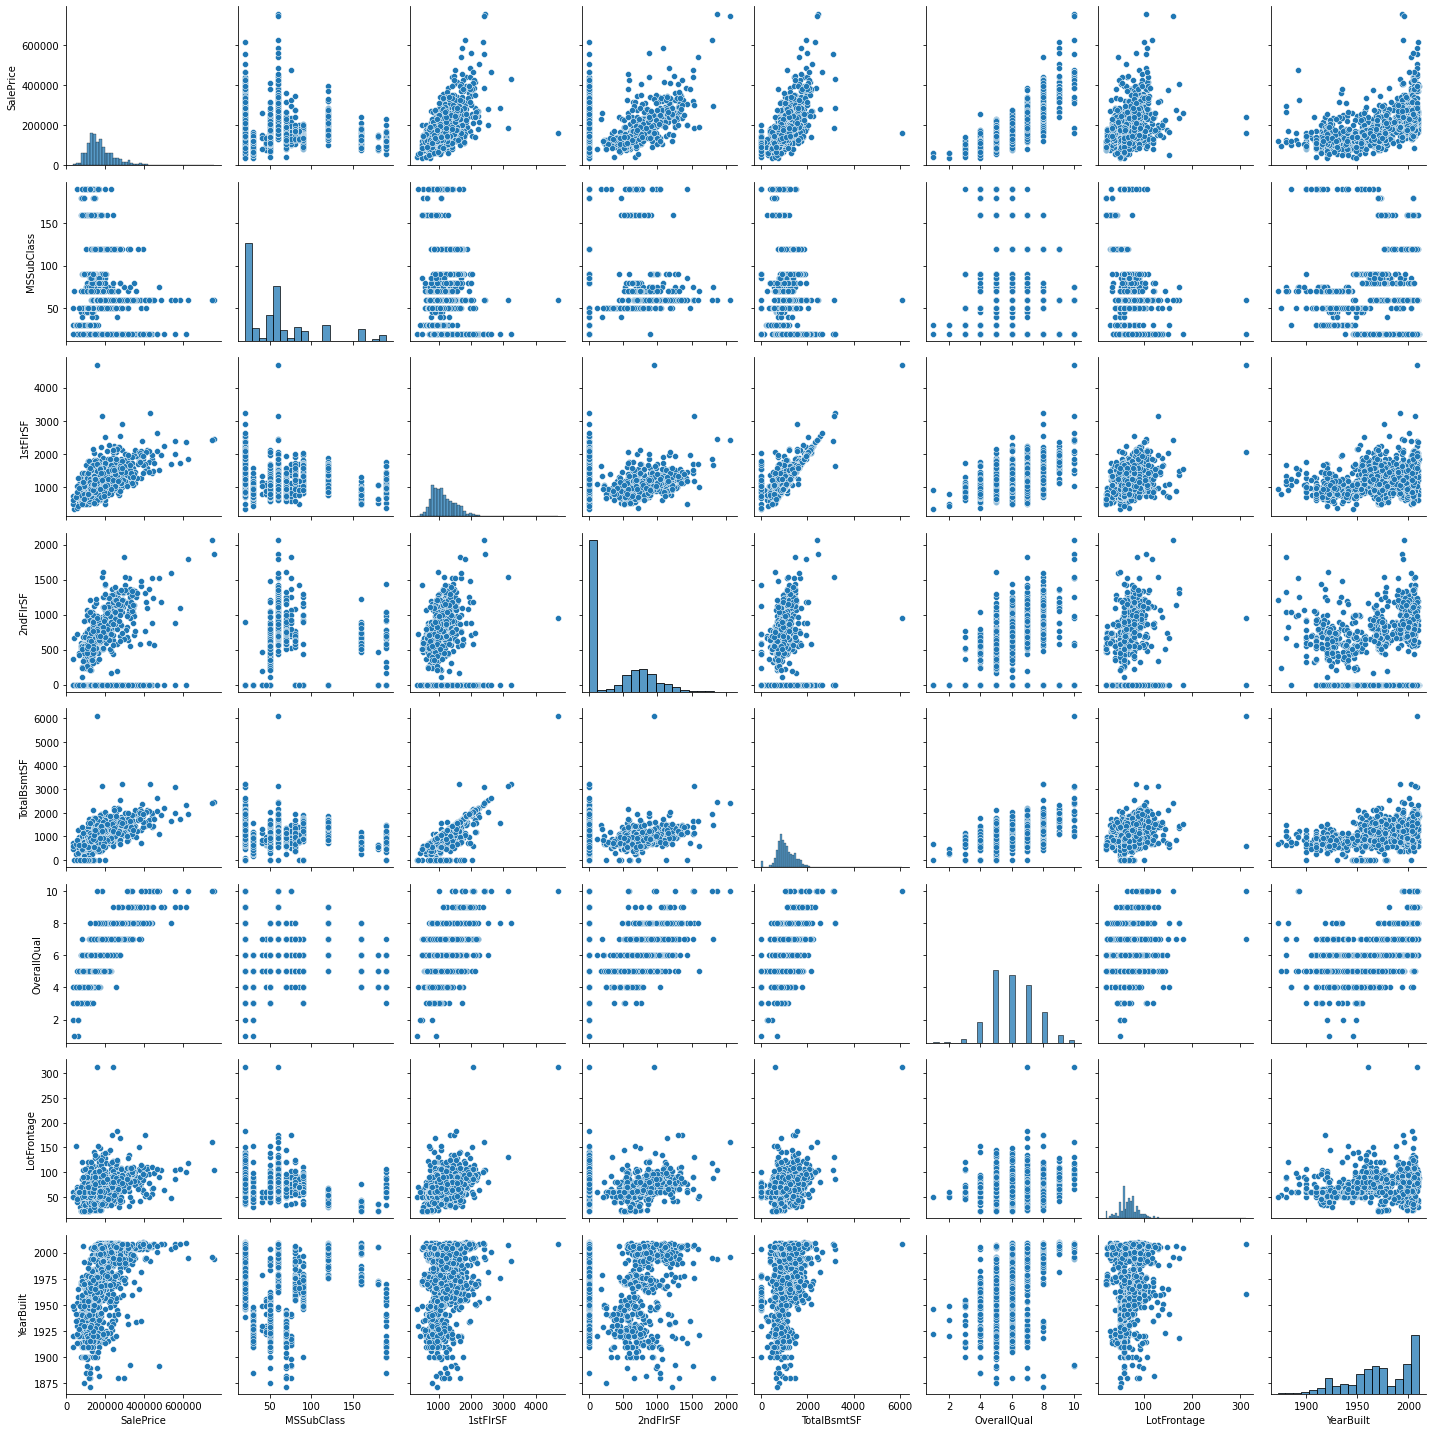

In [5]:
cols = ['SalePrice','MSSubClass','1stFlrSF','2ndFlrSF','TotalBsmtSF','OverallQual','LotFrontage','YearBuilt']

sns.pairplot(df[cols])
plt.tight_layout()
plt.show()

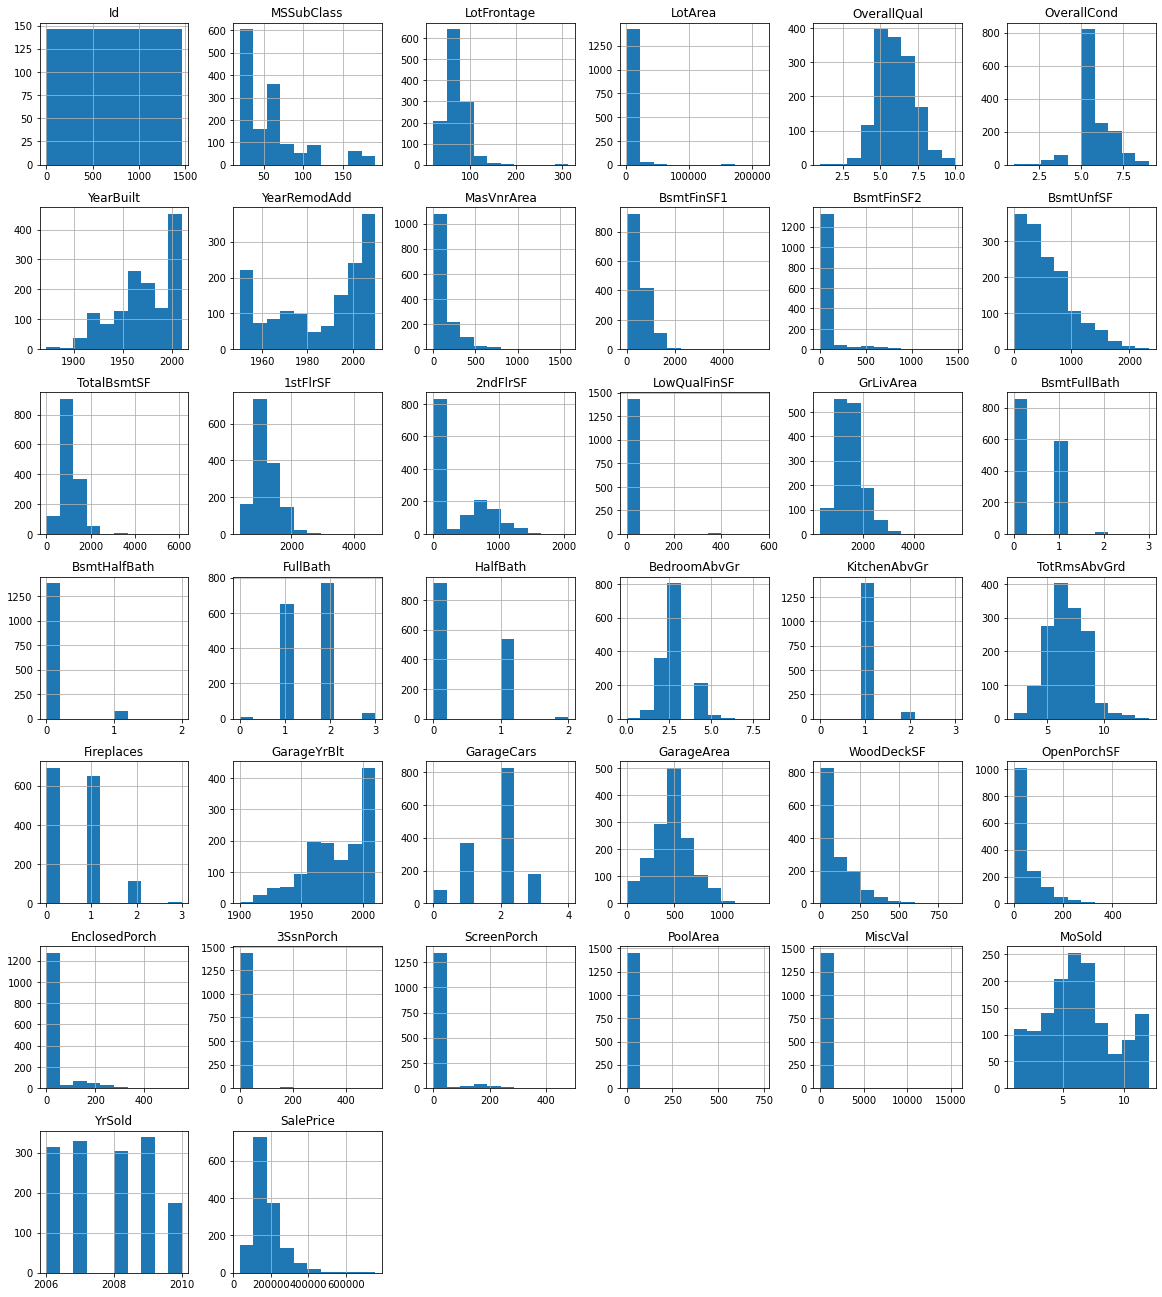

In [6]:
df.hist(figsize=(20,23))
plt.show()

# Feature selection and augmentation

Feature selection

1stFlrSF: First Floor square feet <br>
2ndFlrSF: Second floor square feet <br>
GarageArea: Size of garage in square feet <br>
TotalBsmtSF: Total square feet of basement area <br>
OverallQual: Rates the overall material and finish of the house <br>
PoolArea: Pool area in square feet <br>
YearBuilt: Original construction date <br>
OpenPorchSF: Open porch area in square feet <br>
MasVnrArea: Masonry veneer area in square feet <br>
OverallCond: Rates the overall condition of the house <br>

In [7]:
cols = ['1stFlrSF','2ndFlrSF','GarageArea','TotalBsmtSF','OverallQual',
        'PoolArea','YearBuilt','OpenPorchSF','MasVnrArea','OverallCond']
target = 'SalePrice'

Filling missing values

In [8]:
def fillnans(X):
    col_mean = np.nanmean(X,axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_mean,inds[1])
    return X

In [9]:
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1stFlrSF     1460 non-null   int64  
 1   2ndFlrSF     1460 non-null   int64  
 2   GarageArea   1460 non-null   int64  
 3   TotalBsmtSF  1460 non-null   int64  
 4   OverallQual  1460 non-null   int64  
 5   PoolArea     1460 non-null   int64  
 6   YearBuilt    1460 non-null   int64  
 7   OpenPorchSF  1460 non-null   int64  
 8   MasVnrArea   1452 non-null   float64
 9   OverallCond  1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [10]:
df[cols] = fillnans(df[cols].values)

# Algorithm

Custom linear regressor

In [11]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_new = (X-mean)/std
    return X_new, mean, std

In [12]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [13]:
def hypothesis(X, theta):
    return X.dot(theta)

In [14]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = ((hypothesis(X, theta) - y).T.dot(hypothesis(X, theta) - y)) / (2*m)
    return J

In [15]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_theta = (X.T.dot(hypothesis(X,theta) - y)) / m
    return d_theta

In [16]:
def gradient_descent(X, y, theta, alpha, num_iters, eps, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha * derivative(X, y, theta)
        J = cost_function(X, y, theta)
        err = np.abs(J-J_history[-1])
        if print_J == True:
            print(J)
        J_history.append(J)
        if (err < eps):
            break
    return theta, J_history

In [17]:
def predict(X,mean,std,theta):
    X = (X-mean)/std
    X = prepare_X(X)
    predict = hypothesis(X,theta)
    return predict

Hyperparameters

In [18]:
alpha = 0.01
num_iters = 5000
eps = 1e-12

Main

In [19]:
X_train, y_train = df[cols].values, df[target].values
print('Dataset train: X={}, y={}'.format(X_train.shape, y_train.shape))

Dataset train: X=(1460, 10), y=(1460,)


In [20]:
df = pd.read_csv('test.csv', delimiter=',')
X_test = df[cols].values

In [21]:
X_test = fillnans(X_test)

In [22]:
df = pd.read_csv('sample_submission.csv', delimiter=',')
y_test = df[target].values
print('Dataset test: X={}, y={}'.format(X_test.shape,y_test.shape))

Dataset test: X=(1459, 10), y=(1459,)


In [23]:
X_train_norm, mean, std = normalize(X_train)
X_train_prep = prepare_X(X_train_norm)
theta = np.zeros((len(cols)+1,), dtype=int)

In [24]:
theta, Js = gradient_descent(X_train_prep, y_train, theta, alpha, num_iters, eps, False)
print('Theta: {}'.format(theta))

Theta: [180921.19589041  24527.92213462  21440.97933425   8460.58524401
   8222.17640581  26690.36356912  -1058.65000166  12875.02021772
    314.74147405   5404.47522739   7415.51168264]


In [25]:
print(len(Js))

5001


In [26]:
y_test_pred = predict(X_test,mean,std,theta)

Sklearn regressor

In [27]:
skl_reg = LinearRegression().fit(X_train,y_train)

In [28]:
print(skl_reg.intercept_, skl_reg.coef_)

-947284.4508243081 [ 6.34747893e+01  4.91343077e+01  3.95836094e+01  1.87434776e+01
  1.93054346e+04 -2.63590291e+01  4.26449846e+02  4.75260432e+00
  2.99403400e+01  6.66623988e+03]


In [29]:
y_test_pred_skl = skl_reg.predict(X_test)

# Results evaluation

In [30]:
print("Actual\t\t\tCustomLR\t\tSklearnLR")
for act,exp_cust,exp_skl in zip(y_test[:10],y_test_pred[:10],y_test_pred_skl[:10]):
    print("{:f}\t\t{:f}\t\t{:f}".format(act,exp_cust,exp_skl))

Actual			CustomLR		SklearnLR
169277.052498		127810.774072		127809.503536
187758.393989		168557.679881		168557.208650
183583.683570		164176.874224		164176.854498
179317.477511		189413.752426		189413.761939
150730.079977		215637.168855		215636.721040
177150.989247		176170.441119		176170.247102
172070.659229		178661.688418		178661.807352
175110.956520		167924.061703		167923.957720
162011.698832		199335.667639		199335.504861
160726.247831		96673.468275		96672.590662


In [31]:
print("CustomLR:")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

CustomLR:
MAE: 53371.09645119285
MSE: 4498676205.228847
RMSE: 67072.17161557278


In [32]:
print("SklearnLR:")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred_skl))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_skl))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_skl)))

SklearnLR:
MAE: 53371.22913342636
MSE: 4498685384.125919
RMSE: 67072.24004106259
